In [74]:
from collections import defaultdict
import math
import time 
import matplotlib.pyplot as plt
from tabulate import tabulate
import random
import sys
import numpy as np

sys.setrecursionlimit(10**5)

In [75]:
# some timing functions here that will make comparisons easy
def time_searches(mylist, f):
    start = time.perf_counter()
    f(mylist, random.choice([1,2,3,4,5,6,7,8,9]))  # search for random target
    end = time.perf_counter()
    return end - start

def print_results(results):
    print(
        tabulate(
            results,
            headers=['n', 'scan', 'iterative'],
            floatfmt=".3f",
            tablefmt="github"))

## Iterative

#### Search unordered list using pure iterative method - 

In [76]:
def iterate(f, x, a):
    #print(a)
    # done. do not change me.
    if len(a) == 0:
        return x
    else:
        return iterate(f, f(x, a[0]), a[1:])

# search an unordered list L for a key x using iterate
def isearch(L, x):
    return iterate(bool.__or__, False, [e == x for e in L])
    
def test_isearch():
    assert isearch([1, 3, 5, 4, 2, 9, 7], 2) == (2 in [1, 3, 5, 4, 2, 9, 7])
    assert isearch([1, 3, 5, 2, 9, 7], 7) == (7 in [1, 3, 5, 2, 9, 7])
    assert isearch([1, 3, 5, 2, 9, 7], 99) == (99 in [1, 3, 5, 2, 9, 7])
    assert isearch([], 2) == (2 in [1, 3, 5])

test_isearch()

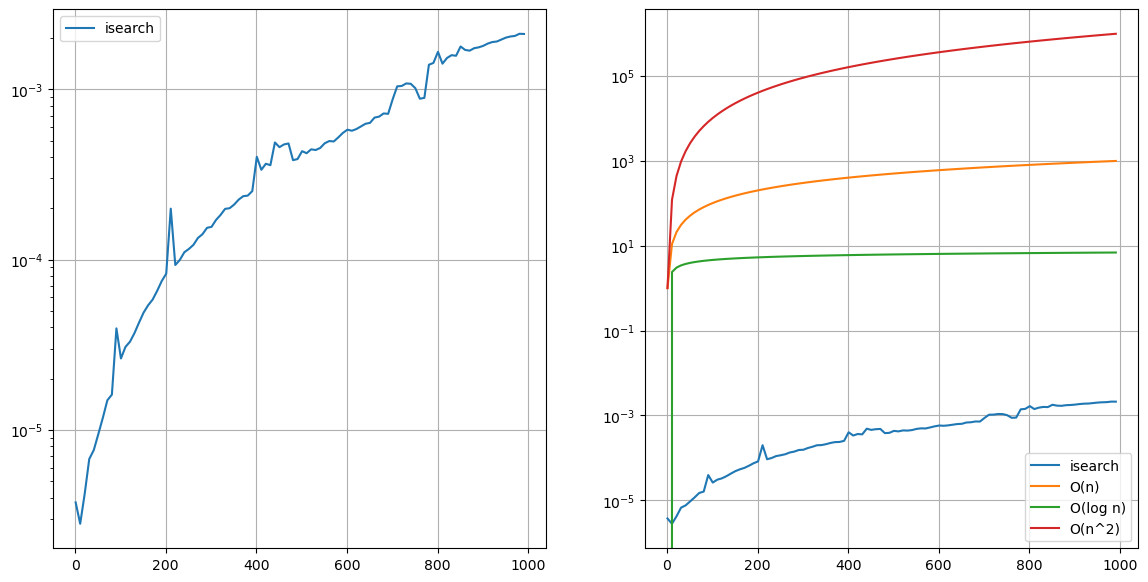

In [77]:
def compare_algorithm_1():
    iterTimes = []
    sizes = list(np.arange(1, 1000, 10))

    for n in sizes:
        mylist = [random.choice([1,2,3,4,5,6,7,8,9]) for _ in range(n)]
        #print(mylist)
        elapsed = time_searches(mylist, isearch)
        iterTimes.append(elapsed)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    ax1.plot(sizes, iterTimes, label="isearch")
    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale("log")

    ax2.plot(sizes, iterTimes, label="isearch")
    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    # O(n)
    n_values = np.arange(1, 1000, 10)

    # O(n^2)
    n_values_squared = n_values ** 2

    # O(log n)
    log_values = np.log(n_values)

    #take some values to plot the different functions
    ax2.plot(n_values, n_values, label="O(n)")
    ax2.plot(n_values, log_values, label="O(log n)")
    ax2.plot(n_values, n_values_squared, label="O(n^2)")

    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    plt.show()

compare_algorithm_1()

## Reduce 

#### Search unordered list using reduce method

In [78]:
def reduce(f, id_, a):
    #print(a)
    # done. do not change me.
    if len(a) == 0:
        return id_
    
    elif len(a) == 1:
        return a[0]
    
    else:
        # can call these in parallel
        res = f(reduce(f, id_, a[:len(a)//2]),
                reduce(f, id_, a[len(a)//2:]))
        return res

def ureduce(f, id_, a):
    if len(a) == 0:
        return id_
    
    elif len(a) == 1:
        return a[0]
    
    else:
        # can call these in parallel
        return f(reduce(f, id_, a[:len(a)//3]),
                 reduce(f, id_, a[len(a)//3:]))

# search an unordered list L for a key x using reduce
def rsearch(L, x):
    return reduce(bool.__or__, False, [e == x for e in L])

def usearch(L, x):
    return ureduce(bool.__or__, False, [e == x for e in L])

def test_rsearch():
    assert rsearch([1, 3, 5, 4, 2, 9, 7], 2) == (2 in [1, 3, 5, 4, 2, 9, 7])
    assert rsearch([1, 3, 5, 2, 9, 7], 7) == (7 in [1, 3, 5, 2, 9, 7])
    assert rsearch([1, 3, 5, 2, 9, 7], 99) == (99 in [1, 3, 5, 2, 9, 7])
    assert rsearch([], 2) == (2 in [1, 3, 5])

test_rsearch()

/tmp/ipykernel_21772/357697937.py:39: RuntimeWarning: divide by zero encountered in log
  loglog_values = np.log(np.log(n_values))


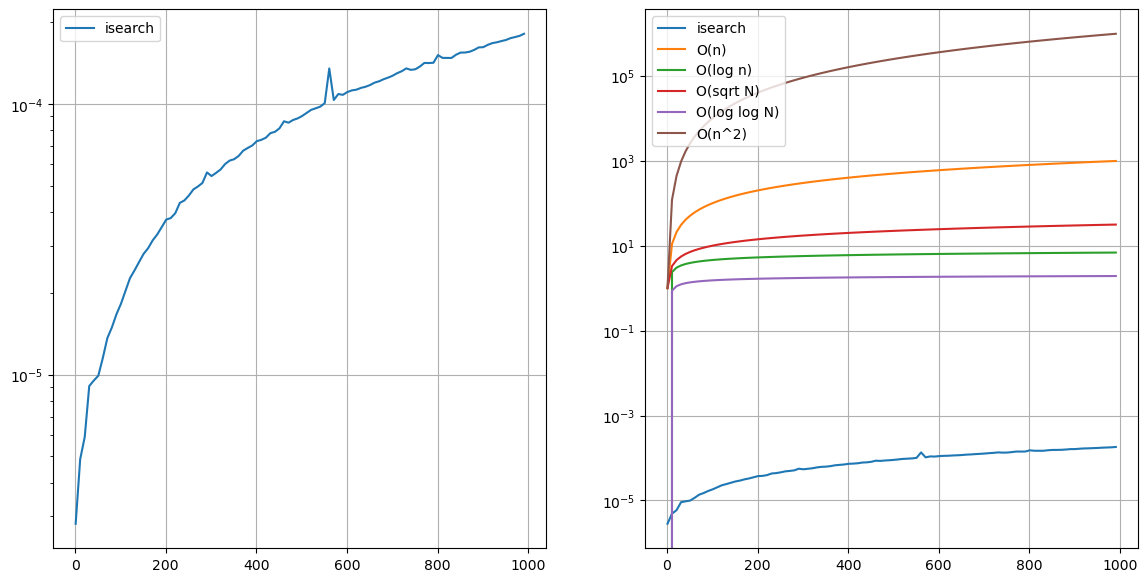

In [79]:
def compare_algorithm_2():

    iterTimes2 = []
    sizes = list(np.arange(1, 1000, 10))

    for n in sizes:
        mylist = [random.choice([1,2,3,4,5,6,7,8,9]) for _ in range(n)]
        #print(mylist)
        elapsed = time_searches(mylist, rsearch)
        iterTimes2.append(elapsed)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    ax1.plot(sizes, iterTimes2, label="isearch")
    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale("log")

    ax2.plot(sizes, iterTimes2, label="isearch")
    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    # O(n)
    n_values = np.arange(1, 1000, 10)

    # O(n^2)
    n_values_squared = n_values ** 2

    # O(log n)
    log_values = np.log(n_values)

    # sqrt of N
    sqrtN = np.sqrt(n_values)

    # log log n
    loglog_values = np.log(np.log(n_values))

    #take some values to plot the different functions
    ax2.plot(n_values, n_values, label="O(n)")
    ax2.plot(n_values, log_values, label="O(log n)")
    ax2.plot(n_values, sqrtN, label="O(sqrt N)")
    ax2.plot(n_values, loglog_values, label="O(log log N)")
    ax2.plot(n_values, n_values_squared, label="O(n^2)")
    
    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    plt.show()

compare_algorithm_2()

/tmp/ipykernel_21772/3414127459.py:39: RuntimeWarning: divide by zero encountered in log
  loglog_values = np.log(np.log(n_values))


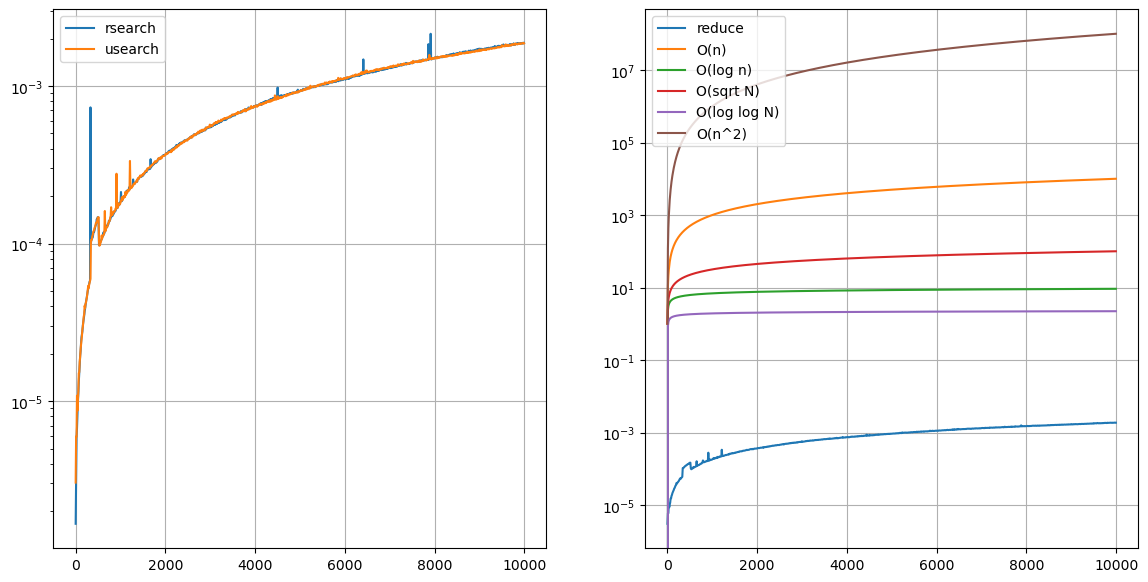

In [80]:
def compare_algorithm_3():
    iterTimes2 = []
    iterTimes3 = []
    sizes = list(np.arange(1, 10000, 10))

    for n in sizes:
        mylist = [random.choice([1,2,3,4,5,6,7,8,9]) for _ in range(n)]
        #print(mylist)
        elapsed_usearch = time_searches(mylist, usearch)
        iterTimes3.append(elapsed_usearch)
        elapsed_rsearch = time_searches(mylist, rsearch)
        iterTimes2.append(elapsed_rsearch)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    ax1.plot(sizes, iterTimes2, label="rsearch")
    ax1.plot(sizes, iterTimes3, label="usearch")
    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale("log")

    ax2.plot(sizes, iterTimes3, label="reduce")

    # O(n)
    n_values = np.arange(1, 10000, 10)

    # O(n^2)
    n_values_squared = n_values ** 2

    # O(log n)
    log_values = np.log(n_values)

    # sqrt of N
    sqrtN = np.sqrt(n_values)

    # log log n
    loglog_values = np.log(np.log(n_values))

    #take some values to plot the different functions
    ax2.plot(n_values, n_values, label="O(n)")
    ax2.plot(n_values, log_values, label="O(log n)")
    ax2.plot(n_values, sqrtN, label="O(sqrt N)")
    ax2.plot(n_values, loglog_values, label="O(log log N)")
    ax2.plot(n_values, n_values_squared, label="O(n^2)")
    
    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    plt.show()

compare_algorithm_3()

## Part 3: Parenthesis Matching - Iterative Solution

In [81]:
#### Iterative solution
def parens_match_iterative(mylist):
    """
    Implement the iterative solution to the parens matching problem.
    This function should call `iterate` using the `parens_update` function.
    
    Params:
      mylist...a list of strings
    Returns
      True if the parenthesis are matched, False otherwise
      
    e.g.,
    >>>parens_match_iterative(['(', 'a', ')'])
    True
    >>>parens_match_iterative(['('])
    False
    """

    return iterate(parens_update, 0, mylist) == 0
    

def parens_update(current_output, next_input):
    """
    This function will be passed to the `iterate` function to 
    solve the balanced parenthesis problem.
    
    Like all functions used by iterate, it takes in:
    current_output....the cumulative output thus far (e.g., the running sum when doing addition)
    next_input........the next value in the input
    
    Returns:
      the updated value of `current_output`
    """

    if current_output < 0:
      return current_output
    
    else:
      if next_input == '(':
        return current_output + 1
    
      elif next_input == ')':
        return current_output - 1
    
      else:
        return current_output

def test_parens_match_iterative():
    assert parens_match_iterative(['(', ')']) == True
    assert parens_match_iterative(['(']) == False
    assert parens_match_iterative([')']) == False
    assert parens_match_iterative(['(', 'a', ')', '(', ')']) == True
    assert parens_match_iterative(['(',  '(', '(', ')', ')', ')']) == True
    assert parens_match_iterative(['(', '(', ')']) == False
    assert parens_match_iterative(['(', 'a', ')', ')', '(']) == False
    assert parens_match_iterative([]) == True

test_parens_match_iterative()

## Part 3: Scan Solution

In [82]:
#### Scan solution

def parens_match_scan(mylist):
    """
    Implement a solution to the parens matching problem using `scan`.
    This function should make one call each to `scan`, `map`, and `reduce`
    
    Params:
      mylist...a list of strings
    Returns
      True if the parenthesis are matched, False otherwise
      
    e.g.,
    >>>parens_match_scan(['(', 'a', ')'])
    True
    >>>parens_match_scan(['('])
    False
    
    """
    mapped = list(map(paren_map, mylist))
    prefixes, total = scan(lambda a, b: a + b, 0, mapped)
    return total == 0 and (len(prefixes) == 0 or min(prefixes) >= 0)

def scan(f, id_, a):
    """
    This is a horribly inefficient implementation of scan
    only to understand what it does.
    We saw a more efficient version in class. You can assume
    the more efficient version is used for analyzing work/span.
    """
    return (
            [reduce(f, id_, a[:i+1]) for i in range(len(a))],
             reduce(f, id_, a)
           )

def paren_map(x):
    """
    Returns 1 if input is '(', -1 if ')', 0 otherwise.
    This will be used by your `parens_match_scan` function.
    
    Params:
       x....an element of the input to the parens match problem (e.g., '(' or 'a')
       
    >>>paren_map('(')
    1
    >>>paren_map(')')
    -1
    >>>paren_map('a')
    0
    """
    if x == '(':
        return 1
    elif x == ')':
        return -1
    else:
        return 0

def min_f(x,y):
    """
    Returns the min of x and y. Useful for `parens_match_scan`.
    """
    if x < y:
        return x
    return y

def test_parens_match_scan():
    assert parens_match_scan(['(', ')']) == True
    assert parens_match_scan(['(']) == False
    assert parens_match_scan([')']) == False
    assert parens_match_scan(['(', 'a', ')', '(', ')']) == True
    assert parens_match_scan(['(',  '(', '(', ')', ')', ')']) == True
    assert parens_match_scan(['(', '(', ')']) == False
    assert parens_match_scan(['(', 'a', ')', ')', '(']) == False
    assert parens_match_scan([]) == True

test_parens_match_scan()

## Part 3: Divide and Conquer Solution

In [83]:
def parens_match_dc(mylist):
    """
    Calls parens_match_dc_helper. If the result is (0,0),
    that means there are no unmatched parentheses, so the input is valid.
    
    Returns:
      True if parens_match_dc_helper returns (0,0); otherwise False
    """
    # done.
    n_unmatched_left, n_unmatched_right = parens_match_dc_helper(mylist)
    return n_unmatched_left==0 and n_unmatched_right==0

def parens_match_dc_helper(mylist):
    """
    Recursive, divide and conquer solution to the parens match problem.
    
    Returns:
      tuple (R, L), where R is the number of unmatched right parentheses, and
      L is the number of unmatched left parentheses. This output is used by 
      parens_match_dc to return the final True or False value
    """

    if len(mylist) == 0:
        return (0, 0)
    elif len(mylist) == 1:
        if mylist[0] == '(':
            return (0, 1)
        elif mylist[0] == ')':
            return (1, 0)
        else:
            return (0, 0)
    
    # divide
    mid = len(mylist) // 2
    r1, l1 = parens_match_dc_helper(mylist[:mid])
    r2, l2 = parens_match_dc_helper(mylist[mid:])
    
    # conquer (merge)
    match = min(l1, r2)
    r_total = r1 + (r2 - match)
    l_total = l2 + (l1 - match)
    
    return (r_total, l_total)
    
def test_parens_match_dc():
    assert parens_match_dc(['(', ')']) == True
    assert parens_match_dc(['(']) == False
    assert parens_match_dc([')']) == False
    assert parens_match_dc(['(', 'a', ')', '(', ')']) == True
    assert parens_match_dc(['(',  '(', '(', ')', ')', ')']) == True
    assert parens_match_dc(['(', '(', ')']) == False
    assert parens_match_dc(['(', 'a', ')', ')', '(']) == False
    assert parens_match_dc([]) == True 

test_parens_match_dc()

Divide and Conquer is fastest.
Faster than iterative by: 11.99%
Faster than scan by: 0.23%

|        n |    scan |   iterative |
|----------|---------|-------------|
|    1.000 |   0.004 |       0.002 |
|   11.000 |   0.017 |       0.002 |
|   21.000 |   0.042 |       0.003 |
|   31.000 |   0.090 |       0.005 |
|   41.000 |   0.152 |       0.006 |
|   51.000 |   0.224 |       0.007 |
|   61.000 |   0.310 |       0.009 |
|   71.000 |   0.403 |       0.011 |
|   81.000 |   0.521 |       0.011 |
|   91.000 |   0.654 |       0.038 |
|  101.000 |   0.796 |       0.024 |
|  111.000 |   0.972 |       0.024 |
|  121.000 |   1.693 |       0.025 |
|  131.000 |   2.162 |       0.068 |
|  141.000 |   2.032 |       0.055 |
|  151.000 |   1.762 |       0.050 |
|  161.000 |   2.006 |       0.040 |
|  171.000 |   2.316 |       0.041 |
|  181.000 |   2.545 |       0.045 |
|  191.000 |   2.822 |       0.057 |
|  201.000 |   3.087 |       0.057 |
|  211.000 |   3.412 |       0.061 |
|  221.000 |   3.687

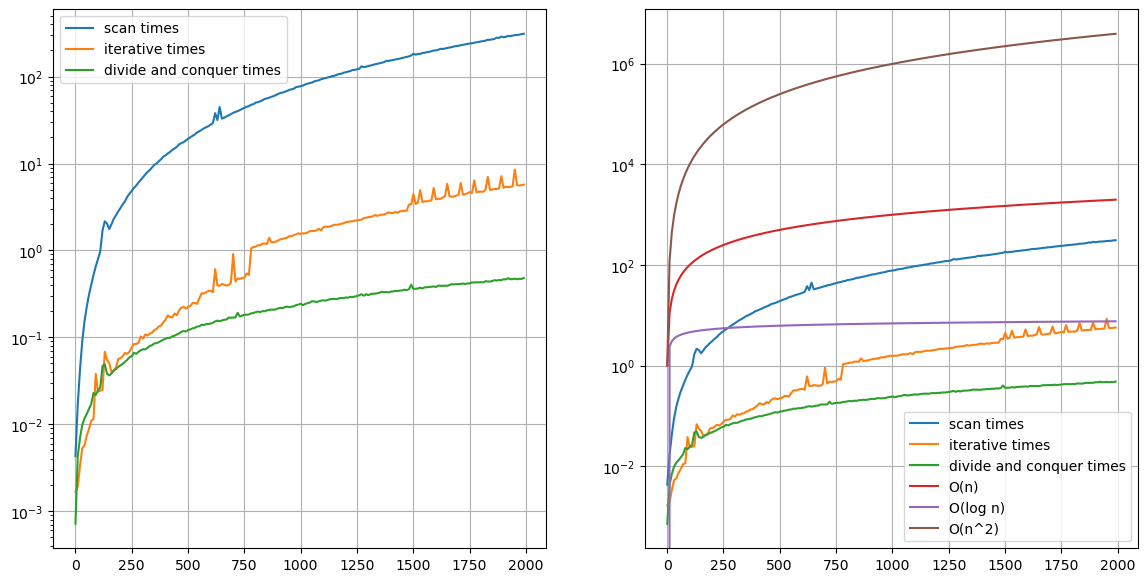

In [84]:
# some timing functions here that will make comparisons easy
def time_parens(xlist, f):
    start = time.time()
    # multiply two numbers x, y using function f
    f(xlist)
    return (time.time() - start)*1000

def print_results(results):
    print(
        tabulate(
            results,
            headers=['n', 'scan', 'iterative'],
            floatfmt=".3f",
            tablefmt="github"))

def compare_parenthesis():
    res = []
    iterTimes = []
    scanTimes = []
    divideTimes = []

    sizes = list(np.arange(1,2000,10))
    for n in sizes:
        mylist = [random.choice(['(', ')', 'a', 'b', 'c']) for character in range(n)]

        #print(f'current list size: {len(mylist)}')

        iter = time_parens(mylist, parens_match_iterative)
        iterTimes.append(iter)

        scan = time_parens(mylist, parens_match_scan)
        scanTimes.append(scan)

        divide = time_parens(mylist, parens_match_dc)
        divideTimes.append(divide)

        res.append((n, scan, iter))

    avg_scanTime = sum(scanTimes)
    avg_iterTime = sum(iterTimes)
    avg_dcTime = sum(divideTimes)

    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    ax1.plot(sizes, scanTimes, label="scan times")
    ax1.plot(sizes, iterTimes, label="iterative times")
    ax1.plot(sizes, divideTimes, label='divide and conquer times')

    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale("log")

    ax2.plot(sizes, scanTimes, label="scan times")
    ax2.plot(sizes, iterTimes, label="iterative times")
    ax2.plot(sizes, divideTimes, label='divide and conquer times')

    # O(n)
    n_values = np.arange(1, 2000, 10)

    # O(n^2)
    n_values_squared = n_values ** 2

    # O(log n)
    log_values = np.log(n_values)

    if avg_dcTime < avg_iterTime and avg_dcTime < avg_scanTime:
        print(f"Divide and Conquer is fastest.\nFaster than iterative by: {round(((avg_dcTime) / avg_iterTime) * 100, 2)}%")
        print(f"Faster than scan by: {round(((avg_dcTime) / avg_scanTime) * 100, 2)}%\n")

    #take some values to plot the different functions
    ax2.plot(n_values, n_values, label="O(n)")
    ax2.plot(n_values, log_values, label="O(log n)")
    ax2.plot(n_values, n_values_squared, label="O(n^2)")

    ax2.legend()
    ax2.grid(True)
    ax2.set_yscale("log")

    print_results(res)
    
compare_parenthesis()